# Training & Validation

## Initialization

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

def running_average_smoothing(y, n_samples=10):
    y_smooth = []
    for i in range(0, y.shape[0]):
        avg = 0
        if i < (n_samples-1):
            avg = np.average(y[0:i+1])
        else:
            avg = np.average(y[i-(n_samples-1):i+1])
            if math.isnan(avg):
                raise ValueError(f"index {i}, values {y[i-(n_samples-1):i+1]}")
        y_smooth.append(avg)
    return y_smooth

learning_rates = ["lr5e-5", "lr3e-5", "lr2e-5", "lr1e-5", "lr2e-4"]
epsilons = ["eps1e-8", "eps1e-6"]
training_step = "training_step"
validation_step = "validation_step"

## Fine Tuning

In [3]:
log_dir = os.path.join("logs")
ft_train_f1_score_iii_log_path = os.path.join(log_dir, "ft_train_f1_score_iii.csv")
ft_train_f1_score_EEE_log_path = os.path.join(log_dir, "ft_train_f1_score_EEE.csv")
ft_val_f1_score_iii_log_path = os.path.join(log_dir, "ft_val_f1_score_iii.csv")
ft_val_f1_score_EEE_log_path = os.path.join(log_dir, "ft_val_f1_score_EEE.csv")


ft_train_f1_score_iii_df = pd.read_csv(ft_train_f1_score_iii_log_path)
ft_train_f1_score_EEE_df = pd.read_csv(ft_train_f1_score_EEE_log_path)
ft_val_f1_score_iii_df = pd.read_csv(ft_val_f1_score_iii_log_path)
ft_val_f1_score_EEE_df = pd.read_csv(ft_val_f1_score_EEE_log_path)

### Raw Viz

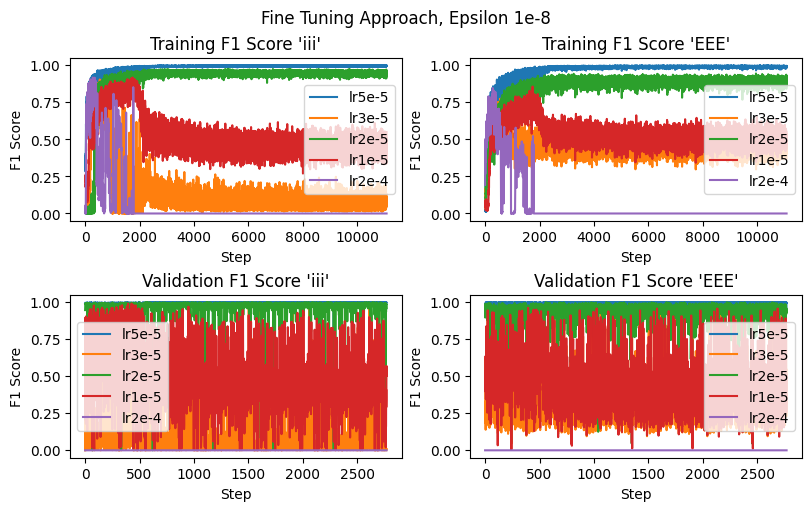

In [12]:
suptitle = "Fine Tuning Approach, Epsilon 1e-8"

figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# ft train iii
for lr in learning_rates:
    axes[0][0].plot(
        ft_train_f1_score_iii_df[training_step].values,
        ft_train_f1_score_iii_df[lr].values,
        label=lr
    )

axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")
axes[0][0].legend()

# ft train EEE
for lr in learning_rates:
    axes[0][1].plot(
        ft_train_f1_score_EEE_df[training_step].values,
        ft_train_f1_score_EEE_df[lr].values,
        label=lr
    )

axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")
axes[0][1].legend()

# ft val iii
for lr in learning_rates:
    axes[1][0].plot(
        ft_val_f1_score_iii_df[validation_step].values,
        ft_val_f1_score_iii_df[lr].values,
        label=lr
    )

axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")
axes[1][0].legend()

# ft val EEE
for lr in learning_rates:
    axes[1][1].plot(
        ft_val_f1_score_EEE_df[validation_step].values,
        ft_val_f1_score_EEE_df[lr].values,
        label=lr
    )

axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()

### Smoothed Viz

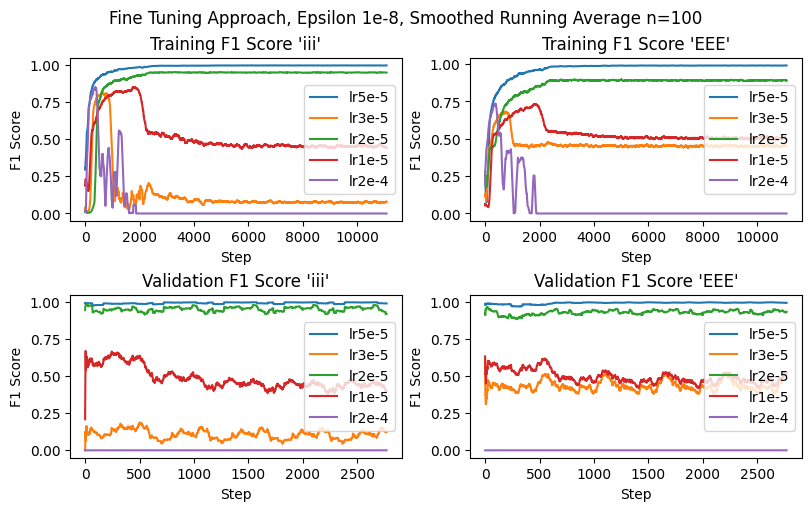

In [48]:
training_step = "training_step"
validation_step = "validation_step"
suptitle = "Fine Tuning Approach, Epsilon 1e-8, Smoothed Running Average n=100"

figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# ft train iii
for lr in learning_rates:
    axes[0][0].plot(
        ft_train_f1_score_iii_df[training_step].values,
        running_average_smoothing(
            ft_train_f1_score_iii_df[lr].values,
            100
        ),
        label=lr
    )

axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")
axes[0][0].legend()

# ft train EEE
for lr in learning_rates:
    axes[0][1].plot(
        ft_train_f1_score_EEE_df[training_step].values,
        running_average_smoothing(
            ft_train_f1_score_EEE_df[lr].values,
            100
        ),
        label=lr
    )

axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")
axes[0][1].legend()

# ft val iii
for lr in learning_rates:
    axes[1][0].plot(
        ft_val_f1_score_iii_df[validation_step].values,
        running_average_smoothing(
            ft_val_f1_score_iii_df[lr].values,
            100
        ),
        label=lr
    )

axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")
axes[1][0].legend()

# ft val EEE
for lr in learning_rates:
    axes[1][1].plot(
        ft_val_f1_score_EEE_df[validation_step].values,
        running_average_smoothing(
            ft_val_f1_score_EEE_df[lr].values,
            100
        ),
        label=lr
    )

axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()

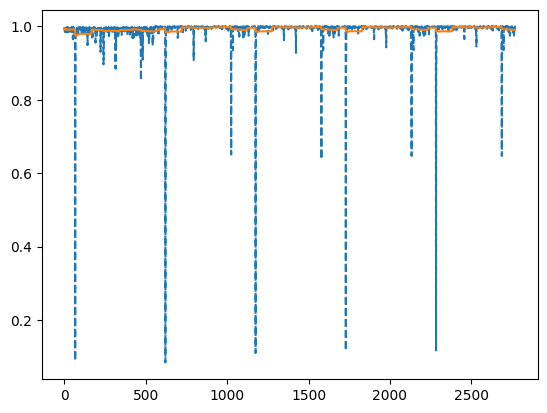

In [82]:
# smoothing
import numpy as np
from scipy.interpolate import interp1d

x = np.asarray(ft_val_f1_score_iii_df[validation_step].values)
y = np.asarray(ft_val_f1_score_iii_df["lr5e-5"].values)
# n_sample = 100
# for i in range(0, y.shape[0]):
#     avg = 0
#     if i < (n_sample-1):
#         avg = np.average(y[0:i+1])
#     else:
#         avg = np.average(y[i-(n_sample-1):i+1])
#     y_smooth.append(avg)

y_smooth = running_average_smoothing(y, 100)
plt.plot(x, y, '--', x, y_smooth, '-')
plt.show()


## Feature Based

In [5]:
learning_rates = ["lr5e-5", "lr3e-5", "lr2e-5", "lr1e-5", "lr2e-4"]

fb_train_f1_score_iii_log_path = os.path.join(log_dir, "fb_train_f1_score_iii.csv")
fb_train_f1_score_EEE_log_path = os.path.join(log_dir, "fb_train_f1_score_EEE.csv")
fb_val_f1_score_iii_log_path = os.path.join(log_dir, "fb_val_f1_score_iii.csv")
fb_val_f1_score_EEE_log_path = os.path.join(log_dir, "fb_val_f1_score_EEE.csv")

fb_train_f1_score_iii_df = pd.read_csv(fb_train_f1_score_iii_log_path)
fb_train_f1_score_EEE_df = pd.read_csv(fb_train_f1_score_EEE_log_path)
fb_val_f1_score_iii_df = pd.read_csv(fb_val_f1_score_iii_log_path)
fb_val_f1_score_EEE_df = pd.read_csv(fb_val_f1_score_EEE_log_path)

### Raw Viz

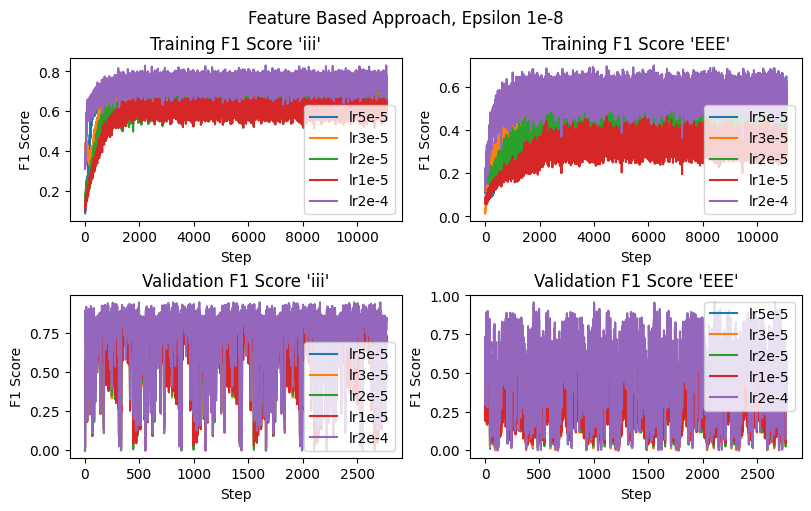

In [14]:
training_step = "training_step"
validation_step = "validation_step"
suptitle = "Feature Based Approach, Epsilon 1e-8"

figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# ft train iii
for lr in learning_rates:
    axes[0][0].plot(
        fb_train_f1_score_iii_df[training_step].values,
        fb_train_f1_score_iii_df[lr].values,
        label=lr
    )

axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")
axes[0][0].legend()

# ft train EEE
for lr in learning_rates:
    axes[0][1].plot(
        fb_train_f1_score_EEE_df[training_step].values,
        fb_train_f1_score_EEE_df[lr].values,
        label=lr
    )

axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")
axes[0][1].legend()

# ft val iii
for lr in learning_rates:
    axes[1][0].plot(
        fb_val_f1_score_iii_df[validation_step].values,
        fb_val_f1_score_iii_df[lr].values,
        label=lr
    )

axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")
axes[1][0].legend()

# ft val EEE
for lr in learning_rates:
    axes[1][1].plot(
        fb_val_f1_score_EEE_df[validation_step].values,
        fb_val_f1_score_EEE_df[lr].values,
        label=lr
    )

axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()


### Smoothed Viz

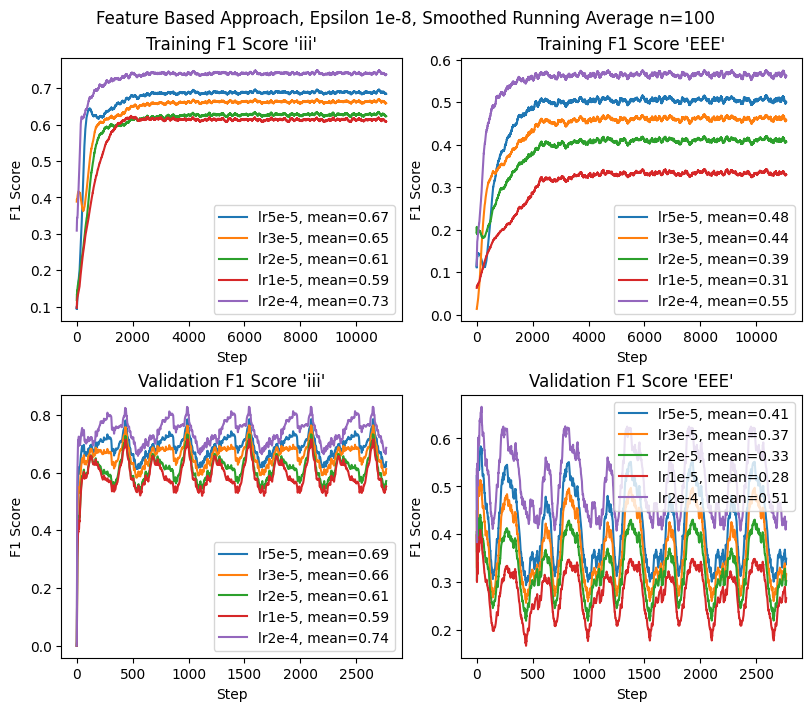

In [8]:
training_step = "training_step"
validation_step = "validation_step"
suptitle = "Feature Based Approach, Epsilon 1e-8, Smoothed Running Average n=100"

figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 7))

# ft train iii
for lr in learning_rates:
    axes[0][0].plot(
        fb_train_f1_score_iii_df[training_step].values,
        running_average_smoothing(
            fb_train_f1_score_iii_df[lr].values,
            100
        ),
        label=f"{lr}, mean={round(np.average(fb_train_f1_score_iii_df[lr].values), 2)}"
    )

axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")
axes[0][0].legend()

# ft train EEE
for lr in learning_rates:
    axes[0][1].plot(
        fb_train_f1_score_EEE_df[training_step].values,
        running_average_smoothing(
            fb_train_f1_score_EEE_df[lr].values,
            100
        ),
        label=f"{lr}, mean={round(np.average(fb_train_f1_score_EEE_df[lr].values), 2)}"
    )

axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")
axes[0][1].legend()

# ft val iii
for lr in learning_rates:
    axes[1][0].plot(
        fb_val_f1_score_iii_df[validation_step].values,
        running_average_smoothing(
            fb_val_f1_score_iii_df[lr].values,
            100
        ),
        label=f"{lr}, mean={round(np.average(fb_val_f1_score_iii_df[lr].values), 2)}"
    )

axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")
axes[1][0].legend()

# ft val EEE
for lr in learning_rates:
    axes[1][1].plot(
        fb_val_f1_score_EEE_df[validation_step].values,
        running_average_smoothing(
            fb_val_f1_score_EEE_df[lr].values,
            100
        ),
        label=f"{lr}, mean={round(np.average(fb_val_f1_score_EEE_df[lr].values), 2)}"
    )

axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()

## Validation Fine Tuning v. Feature Based

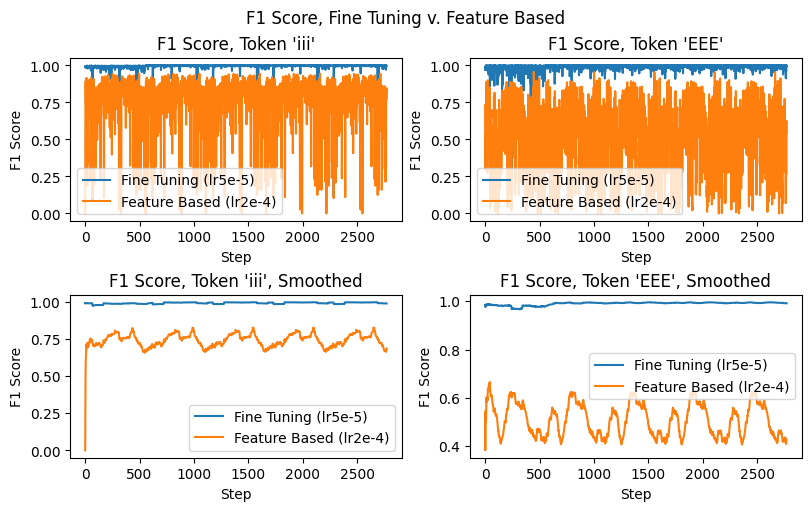

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
fb_f1_score_EEE = pd.read_csv(
    os.path.join(log_dir, "fb_val_f1_score_EEE.csv")
)
fb_f1_score_iii = pd.read_csv(
    os.path.join(log_dir, "fb_val_f1_score_iii.csv")
)
ft_f1_score_EEE = pd.read_csv(
    os.path.join(log_dir, "ft_val_f1_score_EEE.csv")
)
ft_f1_score_iii = pd.read_csv(
    os.path.join(log_dir, "ft_val_f1_score_iii.csv")
)

selected_lr = ["lr2e-4", "lr5e-5"]
suptitle = "Fine Tuning v. Feature Based"
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# iii
axes[0][0].plot(
    ft_f1_score_iii["validation_step"].values,
    ft_f1_score_iii["lr5e-5"].values,
    label="Fine Tuning (lr5e-5)"
)
axes[0][0].plot(
    fb_f1_score_iii["validation_step"].values,
    fb_f1_score_iii["lr2e-4"].values,
    label="Feature Based (lr2e-4)"
)
axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="F1 Score, Token 'iii'")
axes[0][0].legend()

# EEE
axes[0][1].plot(
    ft_f1_score_EEE["validation_step"].values,
    ft_f1_score_EEE["lr5e-5"].values,
    label="Fine Tuning (lr5e-5)"
)
axes[0][1].plot(
    fb_f1_score_EEE["validation_step"].values,
    fb_f1_score_EEE["lr2e-4"].values,
    label="Feature Based (lr2e-4)"
)
axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="F1 Score, Token 'EEE'")
axes[0][1].legend()

# iii smoothed
axes[1][0].plot(
    ft_f1_score_iii["validation_step"].values,
    running_average_smoothing(
        ft_f1_score_iii["lr5e-5"].values,
        100
    ),
    label="Fine Tuning (lr5e-5)"
)
axes[1][0].plot(
    fb_f1_score_iii["validation_step"].values,
    running_average_smoothing(
        fb_f1_score_iii["lr2e-4"].values,
        100
    ),
    label="Feature Based (lr2e-4)"
)
axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="F1 Score, Token 'iii', Smoothed")
axes[1][0].legend()

# EEE smoothed
axes[1][1].plot(
    ft_f1_score_EEE["validation_step"].values,
    running_average_smoothing(
        ft_f1_score_EEE["lr5e-5"].values,
        100
    ),
    label="Fine Tuning (lr5e-5)"
)
axes[1][1].plot(
    fb_f1_score_EEE["validation_step"].values,
    running_average_smoothing(
        fb_f1_score_EEE["lr2e-4"].values,
        100
    ),
    label="Feature Based (lr2e-4)"
)
axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="F1 Score, Token 'EEE', Smoothed")
axes[1][1].legend()

plt.suptitle("F1 Score, Fine Tuning v. Feature Based")
plt.show()

## Epoch

### Feature Based

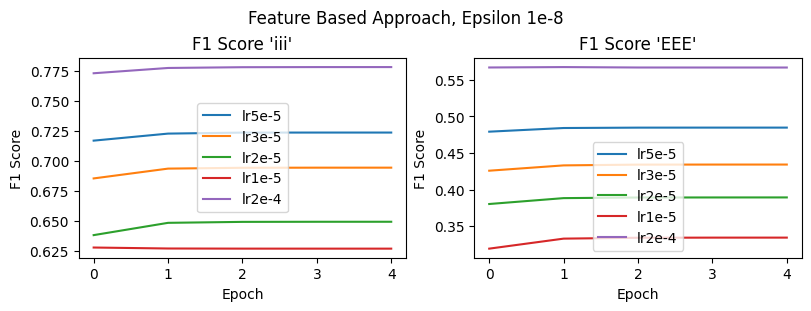

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
fb_f1_score_EEE_log_path = os.path.join(log_dir, "fb_f1_score_EEE.csv")
fb_f1_score_iii_log_path = os.path.join(log_dir, "fb_f1_score_iii.csv")
ft_f1_score_EEE_log_path = os.path.join(log_dir, "ft_f1_score_EEE.csv")
ft_f1_score_iii_log_path = os.path.join(log_dir, "ft_f1_score_iii.csv")

fb_f1_score_EEE_df = pd.read_csv(fb_f1_score_EEE_log_path)
fb_f1_score_iii_df = pd.read_csv(fb_f1_score_iii_log_path)
ft_f1_score_EEE_df = pd.read_csv(ft_f1_score_EEE_log_path)
ft_f1_score_iii_df = pd.read_csv(ft_f1_score_iii_log_path)


figs, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8, 3))
xs = [i for i in range(5)]

# feature based.
suptitle = "Feature Based Approach, Epsilon 1e-8"
for lr in learning_rates:
    axes[0].plot(
        xs,
        fb_f1_score_iii_df[lr].values,
        label=lr
    )
axes[0].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score 'iii'")
axes[0].legend()

for lr in learning_rates:
    axes[1].plot(
        xs,
        fb_f1_score_EEE_df[lr].values,
        label=lr
    )
axes[1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score 'EEE'")
axes[1].legend()

plt.suptitle(suptitle)
plt.show()



### Fine Tuning

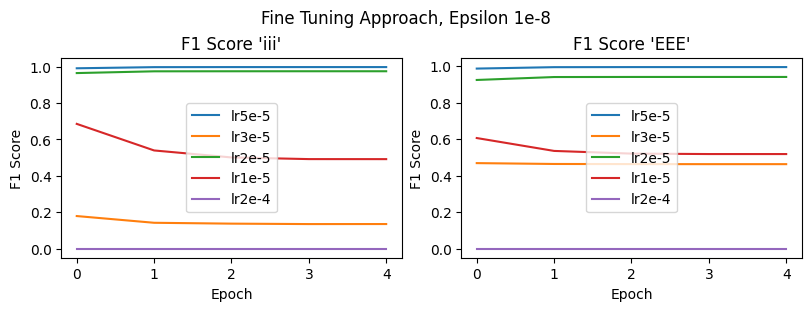

In [58]:
figs, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8, 3))
xs = [i for i in range(5)]

# feature based.
suptitle = "Fine Tuning Approach, Epsilon 1e-8"
for lr in learning_rates:
    axes[0].plot(
        xs,
        ft_f1_score_iii_df[lr].values,
        label=lr
    )
axes[0].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score 'iii'")
axes[0].legend()

for lr in learning_rates:
    axes[1].plot(
        xs,
        ft_f1_score_EEE_df[lr].values,
        label=lr
    )
axes[1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score 'EEE'")
axes[1].legend()

plt.suptitle(suptitle)
plt.show()


## Epsilon Effect on Performance

### Raw Viz

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

log_dir = os.path.join("logs")

ft_f1_score_eps_EEE = pd.read_csv(os.path.join(log_dir, "ft_f1_score_eps1e-6v1e-8_EEE.csv"))
ft_f1_score_eps_iii = pd.read_csv(os.path.join(log_dir, "ft_f1_score_eps1e-6v1e-8_iii.csv"))
ft_train_f1_score_eps_EEE = pd.read_csv(os.path.join(log_dir, "ft_train_f1_score_eps1e-6v1e-8_EEE.csv"))
ft_train_f1_score_eps_iii = pd.read_csv(os.path.join(log_dir, "ft_train_f1_score_eps1e-6v1e-8_iii.csv"))
ft_val_f1_score_eps_EEE = pd.read_csv(os.path.join(log_dir, "ft_val_f1_score_eps1e-6v1e-8_EEE.csv"))
ft_val_f1_score_eps_iii = pd.read_csv(os.path.join(log_dir, "ft_val_f1_score_eps1e-6v1e-8_iii.csv"))

ft_val_f1_score_all_token_10_8 = pd.read_csv(os.path.join(log_dir, "ft_f1_score-eps1e-8_all_tokens.csv" ))
ft_val_f1_score_all_token_10_6 = pd.read_csv(os.path.join(log_dir, "ft_f1_score-eps1e-6_all_tokens.csv"))

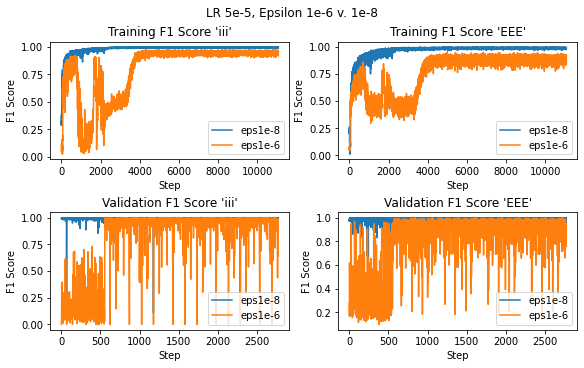

In [39]:


figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

suptitle="LR 5e-5, Epsilon 1e-6 v. 1e-8"

# train
for eps in epsilons:
    axes[0][0].plot(
        ft_train_f1_score_eps_iii[training_step].values,
        ft_train_f1_score_eps_iii[eps].values,
        label=eps
    )
axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")   
axes[0][0].legend()

for eps in epsilons:
    axes[0][1].plot(
        ft_train_f1_score_eps_EEE[training_step].values,
        ft_train_f1_score_eps_EEE[eps].values,
        label=eps
    )
axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")   
axes[0][1].legend()

# validation
for eps in epsilons:
    axes[1][0].plot(
        ft_val_f1_score_eps_iii[validation_step].values,
        ft_val_f1_score_eps_iii[eps].values,
        label=eps
    )
axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")   
axes[1][0].legend()

for eps in epsilons:
    axes[1][1].plot(
        ft_val_f1_score_eps_EEE[validation_step].values,
        ft_val_f1_score_eps_EEE[eps].values,
        label=eps
    )
axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")   
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()

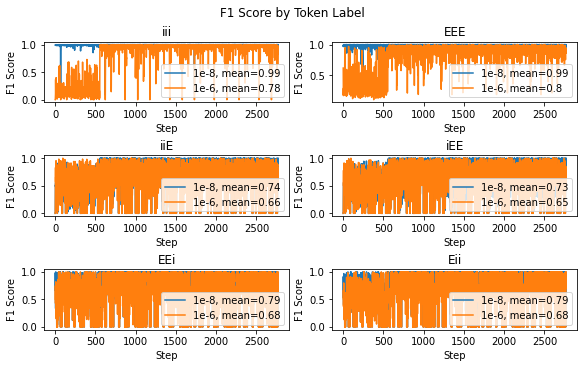

In [40]:
figs, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(8, 5))
suptitle = "F1 Score by Token Label"
token_labels = ["iii", "EEE", "iiE", "iEE", "EEi", "Eii"]
cur_token = 0

for i in [0, 1, 2]:
    for j in [0, 1]:
        cur_token_label = token_labels[cur_token]
        axes[i][j].plot(
            ft_val_f1_score_all_token_10_8["validation_step"],
            ft_val_f1_score_all_token_10_8[cur_token_label],
            label=f"1e-8, mean={round(np.average(ft_val_f1_score_all_token_10_8[cur_token_label]), 2)}"
        )
        axes[i][j].plot(
            ft_val_f1_score_all_token_10_6["validation_step"],
            ft_val_f1_score_all_token_10_6[cur_token_label],
            label=f"1e-6, mean={round(np.average(ft_val_f1_score_all_token_10_6[cur_token_label]), 2)}"
        )
        axes[i][j].legend()
        axes[i][j].set(xlabel="Step", ylabel="F1 Score", title=f"{cur_token_label}")

        cur_token += 1

plt.suptitle(suptitle)
plt.show()



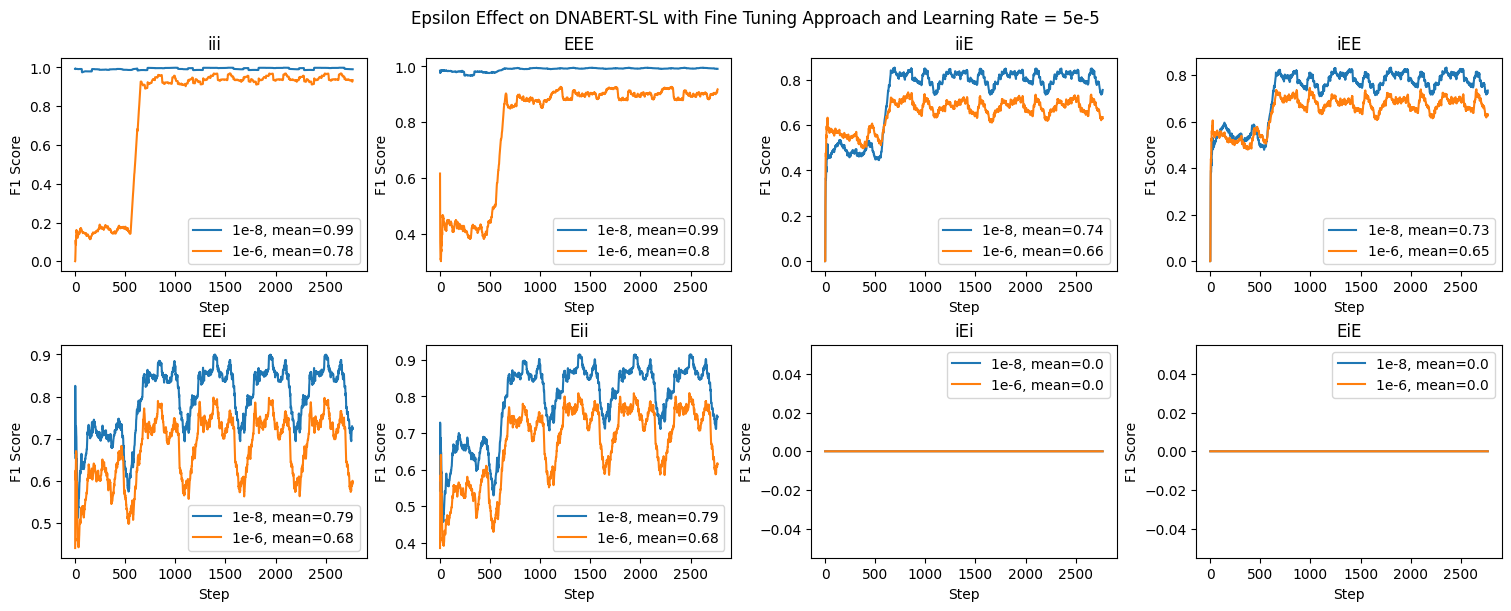

In [21]:
nrows = 2
ncols = 4
figs, axes = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True, figsize=(15, 6))
suptitle = "Epsilon Effect on DNABERT-SL with Fine Tuning Approach and Learning Rate = 5e-5"
suptitle_id = "F1 Score Tiap Label dengan Learning Rate 5e-5"
token_labels = ["iii", "EEE", "iiE", "iEE", "EEi", "Eii", "iEi", "EiE"]
cur_token = 0

for i in range(nrows):
    for j in range(ncols):
        cur_token_label = token_labels[cur_token]
        axes[i][j].plot(
            ft_val_f1_score_all_token_10_8["validation_step"],
            running_average_smoothing(ft_val_f1_score_all_token_10_8[cur_token_label], 100),
            label=f"1e-8, mean={round(np.average(ft_val_f1_score_all_token_10_8[cur_token_label]), 2)}"
        )
        axes[i][j].plot(
            ft_val_f1_score_all_token_10_6["validation_step"],
            running_average_smoothing(ft_val_f1_score_all_token_10_6[cur_token_label], 100),
            label=f"1e-6, mean={round(np.average(ft_val_f1_score_all_token_10_6[cur_token_label]), 2)}"
        )
        axes[i][j].legend()
        axes[i][j].set(xlabel="Step", ylabel="F1 Score", title=f"{cur_token_label}")

        cur_token += 1

plt.suptitle(suptitle)
plt.show()

### Smoothed Viz

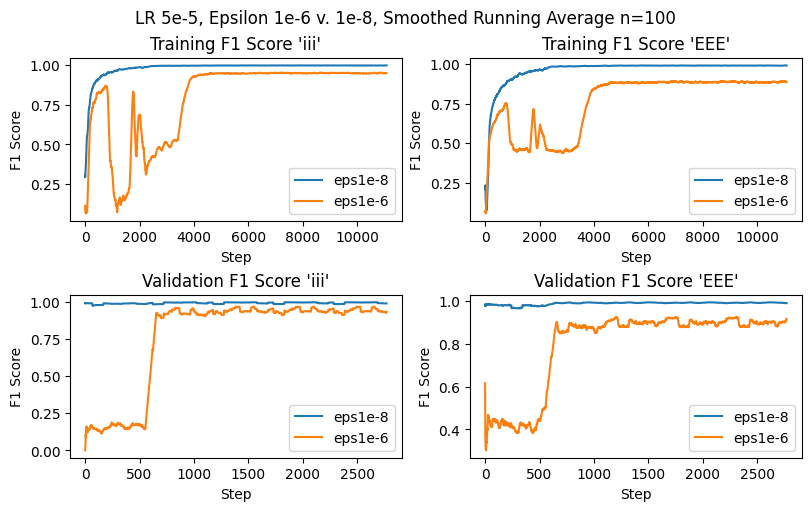

In [71]:
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))
suptitle="LR 5e-5, Epsilon 1e-6 v. 1e-8, Smoothed Running Average n=100"


# train
for eps in epsilons:
    axes[0][0].plot(
        ft_train_f1_score_eps_iii[training_step].values,
        running_average_smoothing(
            ft_train_f1_score_eps_iii[eps].values,
            100
        ),
        label=eps
    )
axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'iii'")   
axes[0][0].legend()

for eps in epsilons:
    axes[0][1].plot(
        ft_train_f1_score_eps_EEE[training_step].values,
        running_average_smoothing(
            ft_train_f1_score_eps_EEE[eps].values,
            100
        ),
        label=eps
    )
axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Training F1 Score 'EEE'")   
axes[0][1].legend()

# validation
for eps in epsilons:
    axes[1][0].plot(
        ft_val_f1_score_eps_iii[validation_step].values,
        running_average_smoothing(
            ft_val_f1_score_eps_iii[eps].values,
            100
        ),
        label=eps
    )
axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'iii'")   
axes[1][0].legend()

for eps in epsilons:
    axes[1][1].plot(
        ft_val_f1_score_eps_EEE[validation_step].values,
        running_average_smoothing(
            ft_val_f1_score_eps_EEE[eps].values,
            100
        ),
        label=eps
    )
axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Validation F1 Score 'EEE'")   
axes[1][1].legend()

plt.suptitle(suptitle)
plt.show()

## Base v. Lin1

In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt

log_dir = os.path.join(log_dir)
ft_f1_score_base_versus_lin1 = pd.read_csv(os.path.join(log_dir, "ft_f1_score_base_versus_lin1_intrapolate.csv"))

archs = ["base", "lin1"]
labels = ["iii", "iiE", "iEi", "Eii", "iEE", "EEi", "EiE", "EEE"]

base_iii = f"{archs[0]}-{labels[0]}"
base_iiE = f"{archs[0]}-{labels[1]}"
base_iEi = f"{archs[0]}-{labels[2]}"
base_Eii = f"{archs[0]}-{labels[3]}"
base_iEE = f"{archs[0]}-{labels[4]}"
base_EEi = f"{archs[0]}-{labels[5]}"
base_EiE = f"{archs[0]}-{labels[6]}"
base_EEE = f"{archs[0]}-{labels[7]}"

lin1_iii = f"{archs[1]}-{labels[0]}"
lin1_iiE = f"{archs[1]}-{labels[1]}"
lin1_iEi = f"{archs[1]}-{labels[2]}"
lin1_Eii = f"{archs[1]}-{labels[3]}"
lin1_iEE = f"{archs[1]}-{labels[4]}"
lin1_EEi = f"{archs[1]}-{labels[5]}"
lin1_EiE = f"{archs[1]}-{labels[6]}"
lin1_EEE = f"{archs[1]}-{labels[7]}"

validation_step = "validation_step"


### Raw Viz

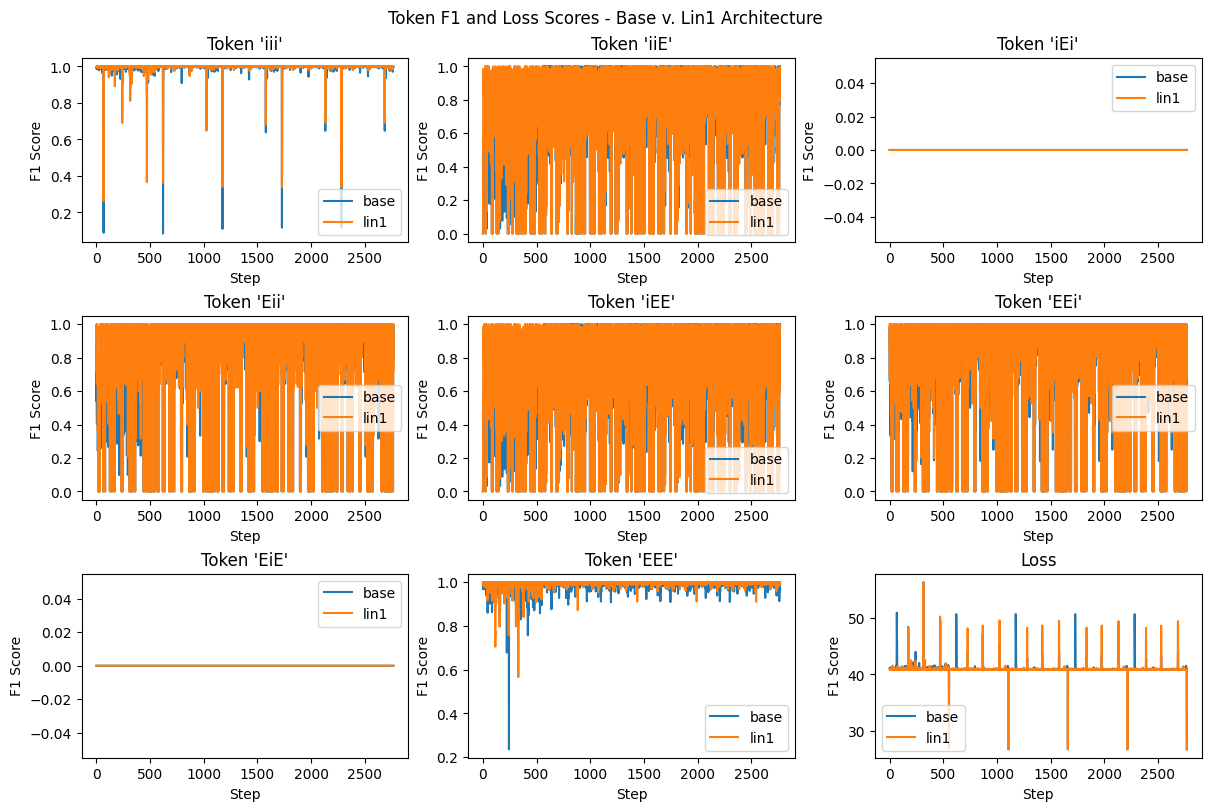

In [116]:
suptitle = "Token F1 and Loss Scores - Base v. Lin1 Architecture"
figs, axes = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(12, 8))

# iii
for a in archs:
    axes[0][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-iii"].values,
        label=a
    )
axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'iii'")
axes[0][0].legend()

# iiE
for a in archs:
    axes[0][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-iiE"].values,
        label=a
    )
axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'iiE'")
axes[0][1].legend()

# iEi
for a in archs:
    axes[0][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-iEi"].values,
        label=a
    )
axes[0][2].set(xlabel="Step", ylabel="F1 Score", title="Token 'iEi'")
axes[0][2].legend()

# Eii
for a in archs:
    axes[1][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-Eii"].values,
        label=a
    )
axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'Eii'")
axes[1][0].legend()

# iEE
for a in archs:
    axes[1][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-iEE"].values,
        label=a
    )
axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'iEE'")
axes[1][1].legend()

# EEi
for a in archs:
    axes[1][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-EEi"].values,
        label=a
    )
axes[1][2].set(xlabel="Step", ylabel="F1 Score", title="Token 'EEi'")
axes[1][2].legend()

# EiE 
for a in archs:
    axes[2][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-EiE"].values,
        label=a
    )
axes[2][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'EiE'")
axes[2][0].legend()

# EEE
for a in archs:
    axes[2][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-EEE"].values,
        label=a
    )
axes[2][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'EEE'")
axes[2][1].legend()

# loss
for a in archs:
    axes[2][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        ft_f1_score_base_versus_lin1[f"{a}-loss"].values,
        label=a
    )
axes[2][2].set(xlabel="Step", ylabel="F1 Score", title="Loss")
axes[2][2].legend()

# showtime!
plt.suptitle(suptitle)
plt.show()


### Smoothed Viz

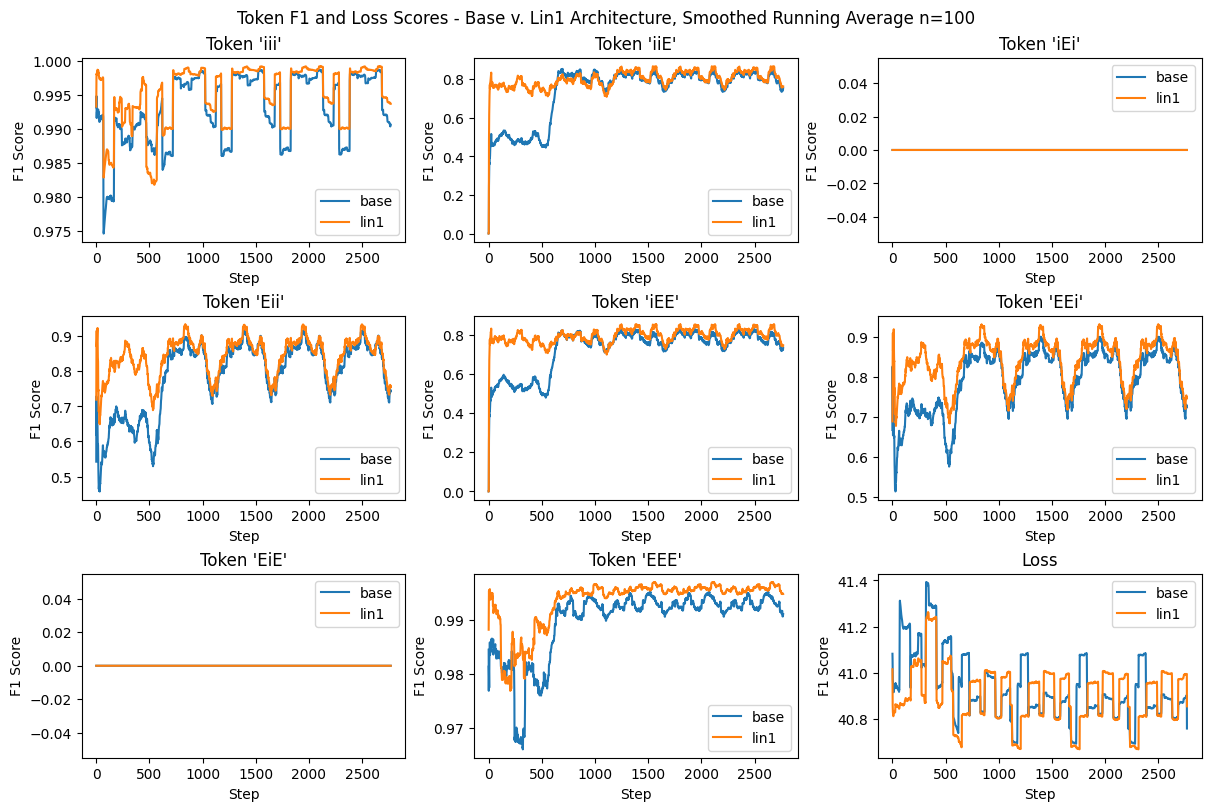

In [117]:
suptitle = "Token F1 and Loss Scores - Base v. Lin1 Architecture, Smoothed Running Average n=100"
figs, axes = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(12, 8))

# iii
for a in archs:
    axes[0][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-iii"].values,
            100
        ),
        label=a
    )
axes[0][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'iii'")
axes[0][0].legend()

# iiE
for a in archs:
    axes[0][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-iiE"].values,
            100
        ),
        label=a
    )
axes[0][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'iiE'")
axes[0][1].legend()

# iEi
for a in archs:
    axes[0][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-iEi"].values,
            100
        ),
        label=a
    )
axes[0][2].set(xlabel="Step", ylabel="F1 Score", title="Token 'iEi'")
axes[0][2].legend()

# Eii
for a in archs:
    axes[1][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-Eii"].values,
            100
        ),
        label=a
    )
axes[1][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'Eii'")
axes[1][0].legend()

# iEE
for a in archs:
    axes[1][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-iEE"].values,
            100
        ),
        label=a
    )
axes[1][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'iEE'")
axes[1][1].legend()

# EEi
for a in archs:
    axes[1][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-EEi"].values,
            100
        ),
        label=a
    )
axes[1][2].set(xlabel="Step", ylabel="F1 Score", title="Token 'EEi'")
axes[1][2].legend()

# EiE 
for a in archs:
    axes[2][0].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-EiE"].values,
            100
        ),
        label=a
    )
axes[2][0].set(xlabel="Step", ylabel="F1 Score", title="Token 'EiE'")
axes[2][0].legend()

# EEE
for a in archs:
    axes[2][1].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-EEE"].values,
            100
        ),
        label=a
    )
axes[2][1].set(xlabel="Step", ylabel="F1 Score", title="Token 'EEE'")
axes[2][1].legend()

# loss
for a in archs:
    axes[2][2].plot(
        ft_f1_score_base_versus_lin1[validation_step].values,
        running_average_smoothing(
            ft_f1_score_base_versus_lin1[f"{a}-loss"].values,
            100
        ),
        label=a
    )
axes[2][2].set(xlabel="Step", ylabel="F1 Score", title="Loss")
axes[2][2].legend()

# showtime!
plt.suptitle(suptitle)
plt.show()

TypeError: string indices must be integers

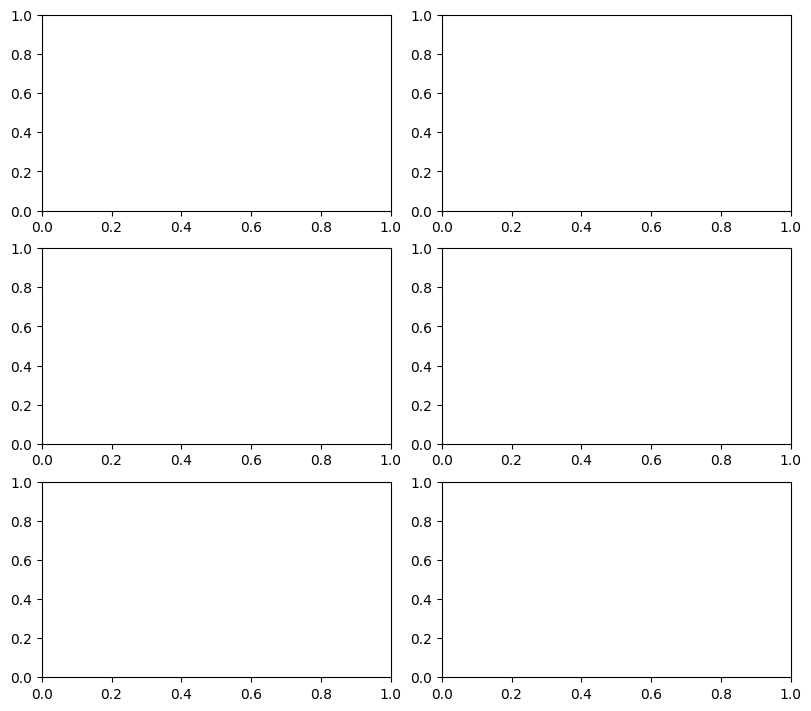

In [23]:
import os
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
base_df = os.path.join(log_dir, "ft_f1_score_base_best.csv")
lin1_df = os.path.join(log_dir, "ft_f1_score_lin1.csv")

token_labels = labels = ["iii", "EEE", "iEE", "iiE", "Eii", "EEi"]
figs, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(8, 7))
index = 0
for i in [0, 1, 2]:
    for j in [0, 1]:
        cur_token_label = token_labels[index]

        axes[i][j].plot(
            base_df["validation_step"],
            base_df[f"{cur_token_label}"]
        )
        axes[i][j].plot(
            lin1_df["validation_step"],
            lin1_df[f"{cur_token_label}"]
        )

        index += 1

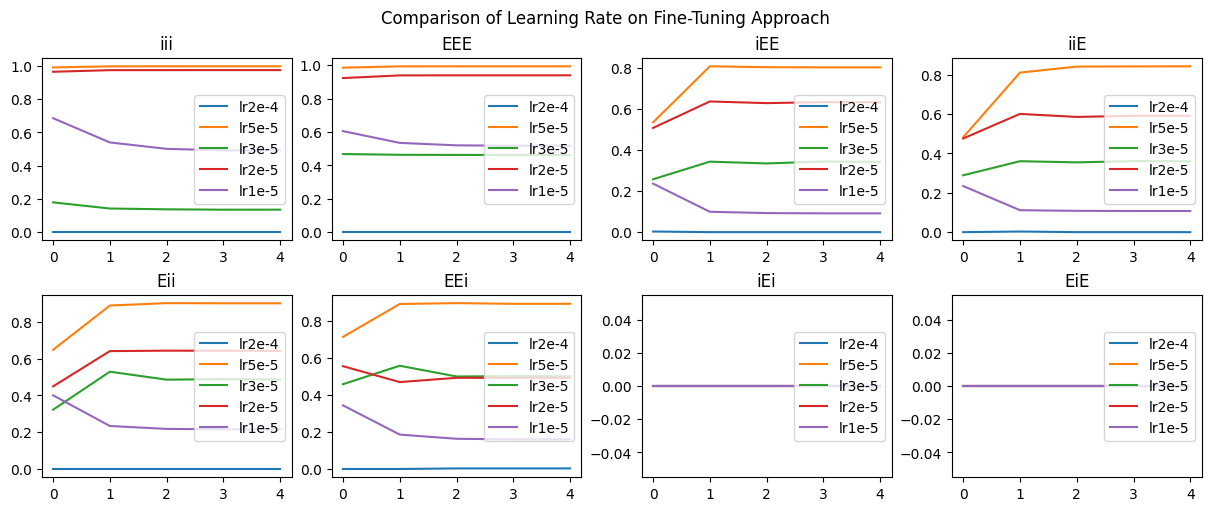

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
ft_df = pd.read_csv(os.path.join(log_dir, "ft-epochs-all-lr.csv"))

token_labels = ["iii", "EEE", "iEE", "iiE", "Eii", "EEi", "iEi", "EiE"]
learning_rates = ["lr2e-4", "lr5e-5", "lr3e-5", "lr2e-5", "lr1e-5"]
xs = [i for i in range(ft_df.shape[0])]
nrows = 2
ncols = 4
figs, axes = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True, figsize=(12, 5))
index = 0
for row in range(nrows):
    for col in range(ncols):
        label = token_labels[index]
        index += 1
        axes[row][col].set(title=f"{label}")    
        for lr in learning_rates:
            axes[row][col].plot(
                xs,
                ft_df[f"{lr}-{label}"].values,
                label=f"{lr}"
            )
        axes[row][col].legend(loc="center right")
        axes[row][col].xaxis.set_ticks(np.arange(0, 5, 1))

plt.suptitle("Comparison of Learning Rate on Fine-Tuning Approach")  
plt.show()

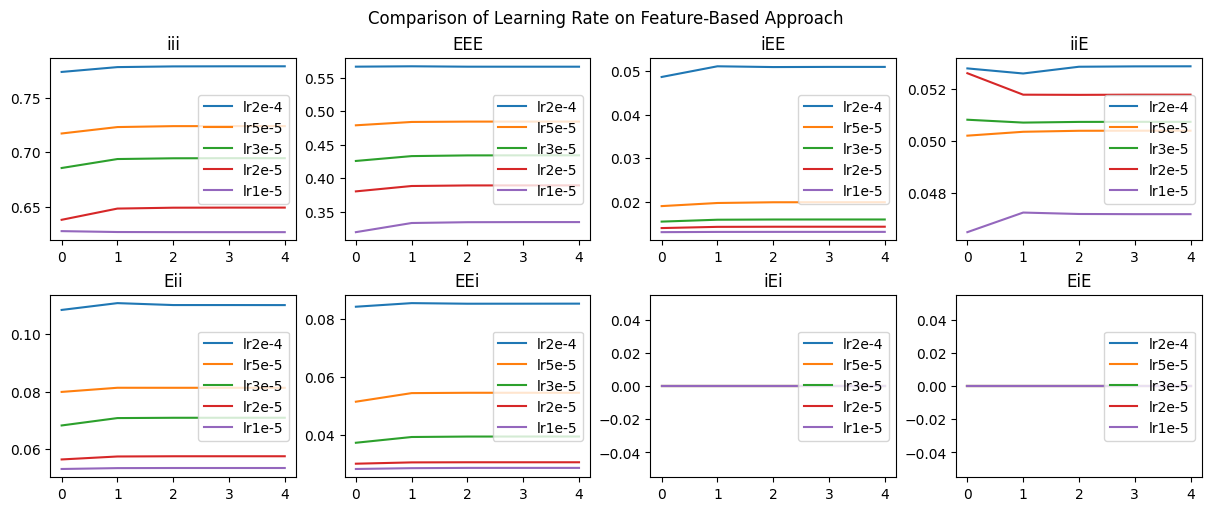

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
fb_df = pd.read_csv(os.path.join(log_dir, "fb-epochs-all-lr.csv"))

token_labels = ["iii", "EEE", "iEE", "iiE", "Eii", "EEi", "iEi", "EiE"]
learning_rates = ["lr2e-4", "lr5e-5", "lr3e-5", "lr2e-5", "lr1e-5"]
xs = [i for i in range(fb_df.shape[0])]
nrows = 2
ncols = 4
figs, axes = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True, figsize=(12, 5))
index = 0
for row in range(nrows):
    for col in range(ncols):
        label = token_labels[index]
        index += 1
        axes[row][col].set(title=f"{label}")    
        for lr in learning_rates:
            axes[row][col].plot(
                xs,
                fb_df[f"{lr}-{label}"].values,
                label=f"{lr}"
            )
        axes[row][col].legend(loc="center right")
        axes[row][col].xaxis.set_ticks(np.arange(0, 5, 1))

plt.suptitle("Comparison of Learning Rate on Feature-Based Approach")  
plt.show()

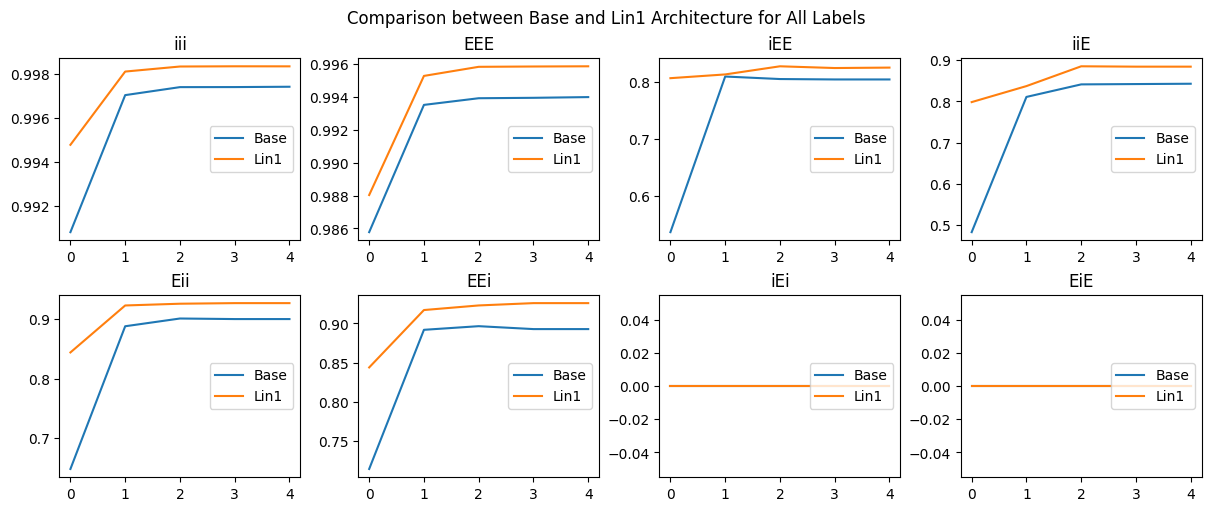

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = os.path.join("logs")
ft_df = pd.read_csv(os.path.join(log_dir, "ft-epochs-all-lr.csv"))

token_labels = ["iii", "EEE", "iEE", "iiE", "Eii", "EEi", "iEi", "EiE"]
learning_rates = [("Base", "lr5e-5"), ("Lin1", "lr5e-5-lin1")]
xs = [i for i in range(ft_df.shape[0])]
nrows = 2
ncols = 4
figs, axes = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True, figsize=(12, 5))
index = 0
for row in range(nrows):
    for col in range(ncols):
        label = token_labels[index]
        index += 1
        axes[row][col].set(title=f"{label}")    
        for lr in learning_rates:
            axes[row][col].plot(
                xs,
                ft_df[f"{lr[1]}-{label}"].values,
                label=f"{lr[0]}"
            )
        axes[row][col].legend(loc="center right")
        axes[row][col].xaxis.set_ticks(np.arange(0, 5, 1))

plt.suptitle("Comparison between Base and Lin1 Architecture for All Labels")  
plt.show()